In [1]:
import pandas as pd
import geopandas as gpd

In [4]:
# .shp => shapefile (very common geo format)
path = gpd.datasets.get_path("naturalearth_lowres")
path

'/home/trh/.local/lib/python3.8/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'

In [5]:
# shapefile => really a collection of related files
!ls /home/trh/.local/lib/python3.8/site-packages/geopandas/datasets/naturalearth_lowres/

naturalearth_lowres.cpg  naturalearth_lowres.prj  naturalearth_lowres.shx
naturalearth_lowres.dbf  naturalearth_lowres.shp


In [6]:
!ls /home/trh/.local/lib/python3.8/site-packages/geopandas/datasets

__init__.py  naturalearth_cities       naturalearth_lowres
__pycache__  naturalearth_creation.py  nybb_16a.zip


In [15]:
df = gpd.read_file(path).set_index("name")
df.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [16]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [17]:
type(df).__mro__ # method resolution order

(geopandas.geodataframe.GeoDataFrame,
 geopandas.base.GeoPandasBase,
 pandas.core.frame.DataFrame,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 pandas.core.arraylike.OpsMixin,
 object)

In [18]:
type(df["geometry"]).__mro__

(geopandas.geoseries.GeoSeries,
 geopandas.base.GeoPandasBase,
 pandas.core.series.Series,
 pandas.core.base.IndexOpsMixin,
 pandas.core.arraylike.OpsMixin,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.indexing.IndexingMixin,
 object)

<class 'shapely.geometry.polygon.Polygon'>


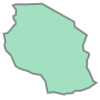

In [21]:
print(type(df["geometry"].iat[1]))
df["geometry"].iat[1]

<class 'shapely.geometry.multipolygon.MultiPolygon'>


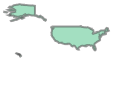

In [22]:
print(type(df["geometry"].at["United States of America"]))
df["geometry"].at["United States of America"]

<AxesSubplot:>

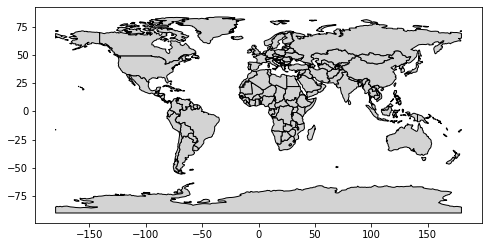

In [27]:
df.plot(figsize=(8,8), color="lightgray", edgecolor="black")

In [31]:
df.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry,colorname
name,,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",red
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",red
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",red
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",red
United States of America,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",red


<AxesSubplot:>

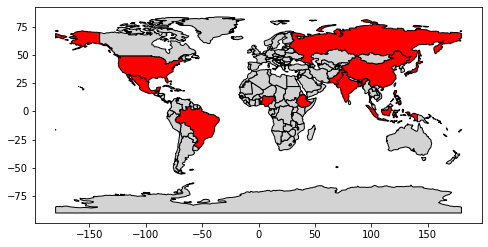

In [32]:
df["colorname"] = "lightgray"
df.loc[df["pop_est"] > 1e8, "colorname"] = "red" # >100 mil
df.plot(figsize=(8,8), color=df["colorname"], edgecolor="black")

<AxesSubplot:>

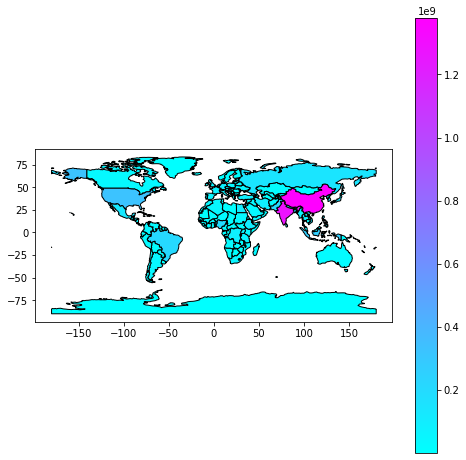

In [35]:
df.plot(figsize=(8,8), column="pop_est", edgecolor="black", cmap="cool", legend=True)

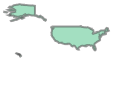

In [36]:
df["geometry"].at["United States of America"]

# Shapely

In [37]:
from shapely.geometry import Polygon, box, Point

<class 'shapely.geometry.polygon.Polygon'>


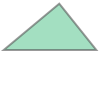

In [39]:
p1 = Polygon([(0,0), (1.2,1), (2,0)])
print(type(p1))
p1

<class 'shapely.geometry.polygon.Polygon'>


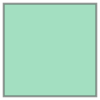

In [41]:
p2 = box(0, 0, 1, 1)
print(type(p2))
p2

<class 'shapely.geometry.point.Point'>


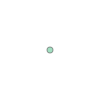

In [43]:
p3 = Point(5,5)
print(type(p3))
p3

<class 'shapely.geometry.polygon.Polygon'>


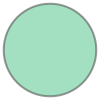

In [45]:
p4 = p3.buffer(2)
print(type(p4))
p4

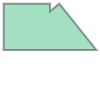

In [46]:
p1.union(p2) # OR

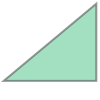

In [47]:
p1.intersection(p2) # AND

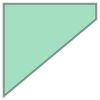

In [48]:
p2.difference(p1) # SUBTRACT

In [49]:
p1.intersects(p2)

True

True


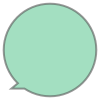

In [57]:
nearby_p3 = p3.buffer(6)
print(p1.intersects(nearby_p3))
p1.union(nearby_p3)

<AxesSubplot:>

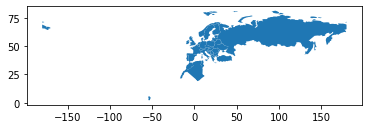

In [62]:
# draw a map of Europe
eur_window = box(-10.67, 34.5, 31.55, 71.05)

df[df.intersects(eur_window)].plot()

<AxesSubplot:>

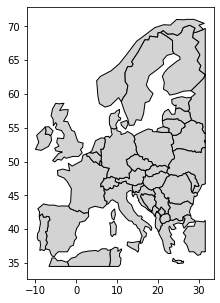

In [73]:
europe1 = df.intersection(eur_window)
europe1 = europe1[~europe1.is_empty]
europe1.plot(color="lightgray", edgecolor="black", figsize=(5,5))

/tmp/ipykernel_192165/1425897950.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  europe1.centroid.plot(ax=area, color="red")


<AxesSubplot:>

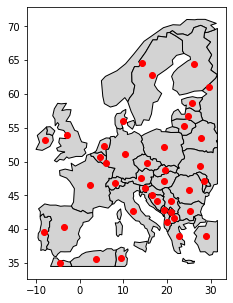

In [75]:
# Example: plot the centroid of each country
area = europe1.plot(color="lightgray", edgecolor="black", figsize=(5,5))
europe1.centroid.plot(ax=area, color="red")

In [76]:
# CRS: coordinate reference system
# re-project: change the CRS
europe1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

/tmp/ipykernel_192165/597223505.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  europe1.centroid.to_crs(europe2.crs).plot(ax=area, color="blue") # incorrect based on lat/lon


<AxesSubplot:>

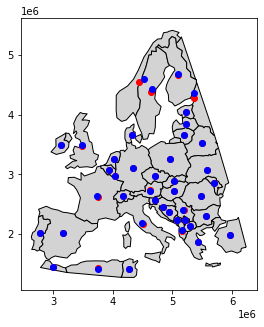

In [83]:
europe2 = europe1.to_crs("EPSG:3035")
area = europe2.plot(color="lightgray", edgecolor="black", figsize=(5,5))
europe2.centroid.plot(ax=area, color="red") # correct
europe1.centroid.to_crs(europe2.crs).plot(ax=area, color="blue") # incorrect based on lat/lon